<div class="usecase-title">Melbourne Bicycle Network Routes and Road Safety: Part 1</div>

<div class="usecase-authors"><b>Authored by: </b> Bree McLennan and Anugra Sara Thomas</div>

<div class="usecase-duration"><b>Duration:</b> 120 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Data engineering and analysis</div>
</div>

<div class="usecase-section-header">Scenario</div>

**1. As a cyclist, I want a safe transport journey in the city of Melbourne. Which roads are safest to cycle on?** 

From a cyclist road users' perspective, I want a safe transport journey in Melbourne. 
I seek to understand which sections of bicycle road network are the safest and which have the highest occurrence of accidents so that I can use this insight to plan the safest possible journey.

**2. As a council, we seek to invest in road safety initiatives which reduce the occurrences of accidents resulting in serious injuries of citizens using our road network. Where are accident hotspots for cyclists occurring?**

From a leadership & strategic perspective, as a council, we seek to invest in road safety initiatives which can effectively reduce the occurrences of accidents resulting in serious injuries and fatalities of citizens using our road network. 

Where are accident hot spots for cyclists (and other road users) occurring?

Are our current approaches to road and bicycle network design working and having the impact we expected?

<div class="usecase-section-header">Objectives for the Exploratory Data Analysis</div>

Using the power of data aggregation, we can combine Melbourne Open datasets such as transport networks and events
With open government datasets including traffic accident ‘crash stats’ from Victoria Police and traffic event data from VicRoads and begin to observe, analyze and report on geographical patterns between these datasets.

We can ask questions such as:

1. Are accidents which involve cyclists occurring on designated bicycle network paths or on different roads? Where, specifically?
2. What are the traffic accident circumstances? Are cyclists colliding with open car doors an increasing or decreasing problem?
3. Do accidents co-occur with road-works, weather events or other disruptive events?

Goals for exploratory data analysis:

1. Analyse the frequency, timing and characteristics of traffic accidents involving cyclists in Melbourne
2. Analyse the geographical location of these accidents and compare to the locations of the bicycle path network
3. Report on sections of roadway where higher accident rates are observed


<div class="usecase-section-header">Strategic benefits for City of Melbourne</div>

This use case and exploratory data analysis project can support the City of Melbourne in the following ways:

1. Support for the ‘Safety and Well-being’ strategic vision and goals

2. Influence the creation of a ‘key risk indicator’ to monitor progress on the reduction of the 'Number of transport-related injuries and fatalities’ on Melbourne roads

3. Support further discussion between City of Melbourne and Victorian Road Safety partner agencies to improve road network design and infrastructure programs

<div class="usecase-section-header">Background on Related Road Safety Initiatives in Victoria</div>

The approach to aggregating key data sources and analysing geographical attributes is currently used by the TAC (Transport Accident Commission) in Victoria when analysing accident hot-spots and reviewing whether the design of the road could be improved to reduce road trauma. 
    
This type of analysis was used by TAC in recent years to assess fatal accident hotspots in Geelong.

The TAC in partnership with the Victorian Road Safety partnering agencies discovered a cluster of fatal accidents occurring over a 5-year period along a specific stretch of road at Thompsons Road, North Geelong.
    
The analysis informed a strategic decision for road safety partners (Victoria Police, VicRoads, City of Greater Geelong, TAC) to re-design the road to make it safer.
    
The road re-design has resulted in a substantial reduction in road trauma along Thompsons Road in North Geelong.

A similar analysis technique and approach could be applied to the City of Melbourne road network


**REFERENCE:**

[1] https://regionalroads.vic.gov.au/map/barwon-south-west-improvements/thompson-road-safety-improvements


<div class="usecase-section-header">Exploratory Data Analysis Worflow Steps</div>

1. Document the data considerations and risk assessments

2. Prepare the Traffic Accident 'crash-stats' source data (this is handled by a separate python notebook)

3. Access and read-in the Melbourne Bicycle Network dataset via the CoM API

4. Explore the Melbourne Bicycle Network dataset

5. Read-in the pre-processed Traffic Accident 'crash-stats' dataset

6. Explore the Traffic Accident 'crash-stats' dataset

7. Visualise the geographical features of the Melbourne Bicycle Network overlaid with Traffic Accident 'crash-stats' dataset

**Dataset list:**
1. Melbourne Open Data Bicycle-Network
2. VicRoads Accident data

<div class="usecase-section-header">Data Considerations</div>

**1. Information Security and Sensitivity**

For the purpose of analysis, the analysis datasets contain de-identified data. No personally identifyable names or contact details are used or included.

**2. Converting raw traffic accident 'crash-stats' data into useful dataset**

After initial observation of the traffic accident data in its raw form, the raw data was prepared and converted into a working ‘.csv’ file and imported into this notebook for further analysis.

The following process was used for converting the raw data into a working dataset:

1. The accident context domains 'person', 'accident' and 'node' were used to form the foundation of the working dataset

    - From the domain 'person', the variable 'road user type' was used to identify 'Bicyclists'
    - From the domain 'accident', the variable 'accidentdate' was used to filter for accident records on and after '1st Jan 2017'    
    - From the domain 'node', the variable 'lga_name' was used to identify the broad geographical area of 'MELBOURNE' city
    
    
2. A series of two inner merges were then performed to construct the working dataset

    - First inner merge on the filtered 'accident' domain and filtered 'person' domain using the primary key 'accident_no'
    - Second inner merge on the output from the step described above, and on the filtered 'node' domain, using 'accident_no'
    
    
3. To obtain additional traffic accident descriptive features, five additional data domains were left joined in sequence

    - 'surface conditions' using the primary key 'accident_no' to join
    - 'SUB DCA' using the primary key 'accident_no' to join
    - 'Atmospheric Conditions' using the primary key 'accident_no' to join
    - 'Accident Location' using the primary key 'accident_no' to join
    - 'Accident Event' using the primary key 'accident_no' to join

4. Variable naming conventions were applied

Variable features which were created in the working dataset use a three-letter acronym prefix to denote the expected general data type values:

- NUM: Numeric values which have a range beyond binary format, may include NA (Missing/Null).
- BIN: Binary values. 1 and 0 only.
- CAT: Categorical value. Structured and consistent groupings.
- TXT: Free/unstructured text.
- TIM: Time values. Specifically formatted as HH:MM:SS.ss.
- DAT: Date values. Specifically formatted as Y-M-D.
- KEY: Primary Key values. Features which uniquely identify the context and records.

A suffix beginning with an underscore was also used to denote the context data domain origin for each feature. For example "_person" denotes a variable which originated from the accident person domain dataset.

Manual data inspection notes:
- The resulting working dataset contains 735 records and 34 features (columns)
- The working dataset records represents 735 bicyclists who have experienced accidents in the city of Melbourne between 1st January 2017 and 31st March 2020
- The primary keys for the working dataset are 'KEYAccidentNumber' and 'KEYPersonID'. The reason for the combination is an accident record can describe multiple bicyclists involved in the accident event, therefore the accident number can be 'duplicated' but differentiated by using the person ID.
- The geographical longitude and latitudes are recorded consistently as part of the work practice when recording accidents in the source system


After creating the working dataset, data opportunities were discovered to create new variables to assist with the analysis:

- Concatenate accident day of week with accident hour
- Concatenate accident road name and type
- Create an accident hour grouping and concatenate with accident day of week

**3. Data cleaning & pre processing**

Excess text whitespace characters were detected in variables 'TIMAccidentTime_accident' and 'CATDCADesc_accident', these were removed.

**4. Geographical Location Data**

In order to answer queries on geographical locations for accidents, the analysis dataset requires longitude and latitude data in order to instruct geographical mapping tools and visualisations. The longitude and latitude data is captured when accident records are entered into the source system.

**5. Additional Data**

None identified.

**6. Data Integrity Checks and Filtering**

- No duplicated data or records were identified
- All records contain a primary key value and less than 10 records were removed due to missing geographical identifies


<div class="usecase-section-header">Setting Up for Analysis</div>

To begin the analysis we first import the necessary libraries to support our exploratory data analysis using Melbourne Open data.

The following are core packages required for this exercise:

- json // Assists with parsing JSON (JavaScript Object Notation) from strings or files.
- folium // Assists with visualising data that's been manipulated in Python on an interactive leaflet map.
- seaborn // Assists with visualization of data. It provides a high-level interface for drawing attractive and informative statistical graphics.


In [1]:
! pip install geopy

In [2]:
###################################################################
# Libraries used for this use case and exploratory data analysis
###################################################################

import os
import time
import sys

from datetime import datetime, date
import numpy as np
import pandas as pd


import geopandas as gpd
from shapely.geometry import Point, LineString, shape

import json
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt

import requests

To connect to the Melbourne Open Data Portal we must establish a connection using their API specifiying the dataset, for larger datasets an application access token which can be requested from the City of Melbourne Open Data portal by registering __[here](https://data.melbourne.vic.gov.au/signup)__

For this exercise we will access the domain without an application token.

In [3]:
########################################################
# Accessing the Melbourne City Bicycle Network Dataset
########################################################

BASE_URL = 'https://data.melbourne.vic.gov.au/api/v2/catalog/datasets/'
NUMBER_OF_RECORDS = 300

FILTERS = f'exports/json?limit={NUMBER_OF_RECORDS}&offset=0&timezone=UTC'
BIKE_ROUTES_ID = 'bicycle-routes-including-informal-on-road-and-off-road-routes'
BIKE_ROUTES_URL = f'{BASE_URL}{BIKE_ROUTES_ID}/{FILTERS}'
BIKE_ROUTES_URL

'https://data.melbourne.vic.gov.au/api/v2/catalog/datasets/bicycle-routes-including-informal-on-road-and-off-road-routes/exports/json?limit=300&offset=0&timezone=UTC'

<div class="usecase-section-header">Exploring the Melbourne Bicycle Network Dataset</div>

Next, we will look at the **Bicycle-Network** dataset, to better understand its structure and how we can use it.

Our data requirements from this use case include the following:
- Visualising the bicycle network to learn where the bicycle paths are located

For this exercise, we start by examining the **Bicycle-Network** dataset.
Each dataset in the Melbourne Open Data Portal has a unique identifier which can be used to retrieve the dataset using the sodapy library.

The **Bicycle-Network** dataset unique identifier is **bicycle-routes-including-informal-on-road-and-off-road-routes**.
We pass this identifier to the API to retrieve this data.

This dataset is placed in a Pandas dataframe.

**Working with the Melbourne Bicycle Network Routes Datase**

The code below describes how to access the **Bicycle Network** dataset. 

In [4]:
# The API URL 
print(f'URL: {BIKE_ROUTES_URL}')

# Call the API and save the output as a json object
result = requests.get(BIKE_ROUTES_URL)
result_json = result.json()

URL: https://data.melbourne.vic.gov.au/api/v2/catalog/datasets/bicycle-routes-including-informal-on-road-and-off-road-routes/exports/json?limit=300&offset=0&timezone=UTC


In [5]:
#Create a dataframe
bicyclepath = pd.DataFrame(result_json)

bicyclepath.rename(columns={'geo_shape':'features'}, inplace=True)

**Accessing the first record in the geoJSON file**

To observe the type of data and values stored within the geoJSON file we can use the following code to observe the first record.

In [6]:
result_json[0]

{'geo_point_2d': {'lon': 144.94940742049585, 'lat': -37.79222994900859},
 'geo_shape': {'type': 'Feature',
  'geometry': {'coordinates': [[[144.951780451295, -37.790231531464],
     [144.951594183988, -37.790102536172],
     [144.951426084087, -37.789997227735],
     [144.951219793223, -37.789875553483],
     [144.951040034637, -37.789781291987],
     [144.950814949454, -37.789666221914],
     [144.950606762186, -37.789573715358],
     [144.950458546866, -37.789509607352],
     [144.950382075468, -37.789476531662],
     [144.950179743176, -37.789403252842],
     [144.949941407549, -37.789324864523],
     [144.949731975549, -37.78930034572],
     [144.949656700406, -37.789296438067],
     [144.949518891611, -37.789301915127],
     [144.949310665252, -37.789313478074],
     [144.949042712738, -37.789334200991],
     [144.948896681956, -37.789354722579],
     [144.94877757098, -37.789376837511],
     [144.948575199288, -37.789416812501],
     [144.948388859584, -37.78945800815],
     [144

**Observing the geoJSON Full Structure and Properties**

By calling the variable 'bicyclepath' we can observe the full structure, properties and values of the geoJSON file.

In [7]:
bicyclepath

,geo_point_2d,features,name,direction,info,status,notes,type
0,"{'lon': 144.94940742049585, 'lat': -37.7922299...","{'type': 'Feature', 'geometry': {'coordinates'...",Off-Road Bike Route,Both Directions,None,None,None,Off-Road Bike Route
1,"{'lon': 144.9177809870309, 'lat': -37.79210545...","{'type': 'Feature', 'geometry': {'coordinates'...",Off-Road Bike Route,Both Directions,None,None,None,Off-Road Bike Route
2,"{'lon': 144.95417546909417, 'lat': -37.7811595...","{'type': 'Feature', 'geometry': {'coordinates'...",Off-Road Bike Route - Capital City Trail,Both Directions,None,None,None,Off-Road Bike Route
3,"{'lon': 144.93230774579578, 'lat': -37.8038877...","{'type': 'Feature', 'geometry': {'coordinates'...",Off-Road Bike Route,Both Directions,None,None,Pre 2012,Off-Road Bike Route
4,"{'lon': 144.95799608462175, 'lat': -37.8051149...","{'type': 'Feature', 'geometry': {'coordinates'...",On-Road Bike Lane,Both Directions,None,None,None,On-Road Bike Lane
...,...,...,...,...,...,...,...,...
269,"{'lon': 144.96372322620255, 'lat': -37.7930771...","{'type': 'Feature', 'geometry': {'coordinates'...",Informal Bike Route,Both Directions,None,None,None,Informal Bike Route
270,"{'lon': 144.951121145982, 'lat': -37.781597817...","{'type': 'Feature', 'geometry': {'coordinates'...",Off-Road Bike Route,Both Directions,None,None,None,Off-Road Bike Route
271,"{'lon': 144.95997953836485, 'lat': -37.7926304...","{'type': 'Feature', 'geometry': {'coordinates'...",Off-Road Bike Route,Both Directions,None,None,None,Off-Road Bike Route
272,"{'lon': 144.9683365705065, 'lat': -37.82471281...","{'type': 'Feature', 'geometry': {'coordinates'...",On-Road Bike Lane,Both Directions,None,Local Proposed,None,On-Road Bike Lane


**Navigating the geoJSON File Structure**

When you load a GeoJSON file using the json library, you get a dictionary that contains an entry 'features', 
which contains the list of features. Each feature in turn consists of a dictionary, which, contains an entry 'geometry'. 

The geometry is a dictionary containing the entries 'type' and 'coordinates'.

The GeoJSON file can be traversed or navigated using the following code:

In [8]:
for feature in bicyclepath['features'][:3]:
    print (feature['geometry']['type'])
    print (feature['geometry']['coordinates'][0][:5])

MultiLineString
[[144.951780451295, -37.790231531464], [144.951594183988, -37.790102536172], [144.951426084087, -37.789997227735], [144.951219793223, -37.789875553483], [144.951040034637, -37.789781291987]]
MultiLineString
[[144.912562850355, -37.794490839317], [144.912593796493, -37.794503625749], [144.912625275213, -37.794515566401], [144.912657249388, -37.7945266489], [144.912689679642, -37.79453685993]]
MultiLineString
[[144.951430861753, -37.780762386091], [144.951413027541, -37.780827483449], [144.951396803723, -37.780966053069], [144.951404424871, -37.781082919798], [144.951437336296, -37.781237719933]]


**Visualising the Melbourne Bicycle Network on a Map**

To visualise the geoJSON file containing the Melbourne Bicycle Network we can use the 'folium' and 'json' packages and the following code.

In [9]:
#Create the base layer map
m = folium.Map(
    location=[-37.81368709240999, 144.95738102347036], #Coordinates are in the Melbourne CBD block
    tiles="cartodbpositron",
    zoom_start=13, 
    control_scale=True,
    prefer_canvas=True, 
    width=800, 
    height=580
)

style = {'fillColor': '#08af64', 'color': '#08af64'}

# iterate through the features in the bicyclepath DataFrame column
for i in range(bicyclepath.shape[0]):
    feature = bicyclepath["features"].loc[i]
    
    # get the coordinates of the feature
    coords = feature["geometry"]["coordinates"]
    coords = [[y, x] for x,y in coords[0]]

    # create a PolyLine object from the coordinates
    line = folium.PolyLine(coords, color='blue', weight=2)
    lon, lat = bicyclepath['geo_point_2d'].loc[i].values()
    
    name,direction,b_type,info,status,notes= bicyclepath.loc[i][['name','direction','type','info','status','notes']]

    iframe = folium.IFrame(f'<h4>{name}</h4><br>Directions: {direction}<br>Notes: {notes}<br>Info: {info}<br>Status: {status}')
    popup = folium.Popup(iframe, min_width=300, max_width=300)
    marker = folium.Marker(location=[lat,lon], icon=folium.Icon(icon='map-marker', prefix='fa'), popup=popup)


    # add the PolyLine to the map
    m.add_child(line)
    m.add_child(marker)

m

<div class="usecase-section-header">Exploring the Traffic Accident 'Crash-Stats' Dataset</div>

This section focuses on setting up the Traffic Accident 'Crash-Stats' dataset and preparing it for use in the exploratory data analysis alongside the Melbourne Bicycle Network dataset.

The raw input dataset contains the following structure:

In [10]:
#Read in the dataset
raw_accidents_bicyclists = pd.read_csv('bicyclenetworkroadsafety-part1/dependencies/Accidents_Bicyclists_Melbourne_2017to2020.csv', parse_dates=['DATAccidentDate_accident'])
raw_accidents_bicyclists.info() # see summary information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   KEYAccidentNumber                       735 non-null    object        
 1   DATAccidentDate_accident                735 non-null    datetime64[ns]
 2   TIMAccidentTime_accident                735 non-null    object        
 3   CATAccidentTypeDesc_accident            735 non-null    object        
 4   CATDayOfWeek_accident                   735 non-null    object        
 5   CATDCADesc_accident                     735 non-null    object        
 6   CATMelwaysPage_accident                 735 non-null    object        
 7   CATMelwaysGridRef_X_accident            735 non-null    object        
 8   CATMelwaysGridRef_Y_accident            735 non-null    object        
 9   CATLightConditionDesc_accident          735 non-null  

**Setting up the Working Accident 'Crash-Stats' Dataset**

The working dataset will have the following structure.

In [11]:
#Create a copy of the raw source dataset
wrk_accident_bicyclists = raw_accidents_bicyclists.copy()

#Create new features from the accident date variable such as a numerical representation of weekday name, week of the year
#day of the year and a separate variable to hold the year of accident.
wrk_accident_bicyclists['NUMDayOfWeek'] = wrk_accident_bicyclists['DATAccidentDate_accident'].dt.strftime('%w')
wrk_accident_bicyclists['NUMWeekOfYear'] = wrk_accident_bicyclists['DATAccidentDate_accident'].dt.strftime('%W')
wrk_accident_bicyclists['NUMDayOfYear'] = wrk_accident_bicyclists['DATAccidentDate_accident'].dt.strftime('%j')
wrk_accident_bicyclists['NUMYearOfAcc'] = wrk_accident_bicyclists['DATAccidentDate_accident'].dt.strftime('%Y')

#Convert the time of accident to a string and clean up excess white space
wrk_accident_bicyclists.TIMAccidentTime_accident = wrk_accident_bicyclists.TIMAccidentTime_accident.astype('string')
wrk_accident_bicyclists.TIMAccidentTime_accident = wrk_accident_bicyclists.TIMAccidentTime_accident.str.rstrip()

#Using the time of accident variable, create new features including accident hour, minute and second 
wrk_accident_bicyclists[['hour','minute','second']] = wrk_accident_bicyclists['TIMAccidentTime_accident'].astype(str).str.split(':', expand=True).astype(str)

#Create a new feature to combine the week day name and hour of accident
wrk_accident_bicyclists['CATWeekDayHour'] = wrk_accident_bicyclists[['CATDayOfWeek_accident', 'hour']].agg(' '.join, axis=1)

#Set the time format for the time of accident variable
wrk_accident_bicyclists['TIMAccidentTime_accident'] = pd.to_datetime(wrk_accident_bicyclists['TIMAccidentTime_accident'], format='%H:%M:%S').dt.time

#Clean up the text white space in the DCA description variable
wrk_accident_bicyclists.CATDCADesc_accident = wrk_accident_bicyclists.CATDCADesc_accident.str.rstrip()

#Create and apply a group mapping for the hour of accident
mapping = {'00': 'Early Morning', '01': 'Early Morning', '02': 'Early Morning', '03': 'Early Morning', '04': 'Early Morning', '05': 'Early Morning',
           '06': 'Morning', '07': 'Morning', '08': 'Morning',  '09': 'Late Morning',  '10': 'Late Morning', '11': 'Late Morning',
           '12': 'Early Afternoon', '13': 'Early Afternoon', '14':'Early Afternoon',  '15': 'Late Afternoon', '16': 'Late Afternoon',
           '17': 'Evening', '18': 'Evening', '19': 'Evening', '20': 'Night', '21': 'Night', '22': 'Night', '23': 'Night' }
wrk_accident_bicyclists['hourgroup'] = wrk_accident_bicyclists.hour.map(mapping)

#Create a new feature which concatenates the week day name and accident hour group mapping
wrk_accident_bicyclists['CATWeekDayHourGroup'] = wrk_accident_bicyclists[['CATDayOfWeek_accident', 'hourgroup']].agg(' '.join, axis=1)

#Convert all categorical variables to strings
wrk_accident_bicyclists.CATAccidentTypeDesc_accident = wrk_accident_bicyclists.CATAccidentTypeDesc_accident.astype('string')
wrk_accident_bicyclists['CATDayOfWeek_accident'] = wrk_accident_bicyclists['CATDayOfWeek_accident'].astype('string')
wrk_accident_bicyclists['CATDCADesc_accident'] = wrk_accident_bicyclists['CATDCADesc_accident'].astype('string')
wrk_accident_bicyclists['CATMelwaysPage_accident'] = wrk_accident_bicyclists['CATMelwaysPage_accident'].astype('string')
wrk_accident_bicyclists['CATMelwaysGridRef_X_accident'] = wrk_accident_bicyclists['CATMelwaysGridRef_X_accident'].astype('string')
wrk_accident_bicyclists['CATMelwaysGridRef_Y_accident'] = wrk_accident_bicyclists['CATMelwaysGridRef_Y_accident'].astype('string')
wrk_accident_bicyclists['CATLightConditionDesc_accident'] = wrk_accident_bicyclists['CATLightConditionDesc_accident'].astype('string')
wrk_accident_bicyclists['CATRoadUserTypeDesc_person'] = wrk_accident_bicyclists['CATRoadUserTypeDesc_person'].astype('string')
wrk_accident_bicyclists['CATTakenHospital_person'] = wrk_accident_bicyclists['CATTakenHospital_person'].astype('string')
wrk_accident_bicyclists['CATInjuryLevelDesc_person'] = wrk_accident_bicyclists['CATInjuryLevelDesc_person'].astype('string')
wrk_accident_bicyclists['CATAgeGroup_person'] = wrk_accident_bicyclists['CATAgeGroup_person'].astype('string')
wrk_accident_bicyclists['CATPostcode_person'] = wrk_accident_bicyclists['CATPostcode_person'].astype('string')
wrk_accident_bicyclists['CATGender_person'] = wrk_accident_bicyclists['CATGender_person'].astype('string')
wrk_accident_bicyclists['CATLGAName_node'] = wrk_accident_bicyclists['CATLGAName_node'].astype('string')
wrk_accident_bicyclists['CATDEGUrbanName_node'] = wrk_accident_bicyclists['CATDEGUrbanName_node'].astype('string')
wrk_accident_bicyclists['CATPostcode_node'] = wrk_accident_bicyclists['CATPostcode_node'].astype('string')
wrk_accident_bicyclists['CATSurfaceConditionDesc_surface'] = wrk_accident_bicyclists['CATSurfaceConditionDesc_surface'].astype('string')
wrk_accident_bicyclists['CATSubDCACodeDesc_subdca'] = wrk_accident_bicyclists['CATSubDCACodeDesc_subdca'].astype('string')
wrk_accident_bicyclists['CATAtmosphericConditionDesc_atmosphere'] = wrk_accident_bicyclists['CATAtmosphericConditionDesc_atmosphere'].astype('string')
wrk_accident_bicyclists['CATRoadName_acclocation'] = wrk_accident_bicyclists['CATRoadName_acclocation'].astype('string')
wrk_accident_bicyclists['CATRoadNameInt_acclocation'] = wrk_accident_bicyclists['CATRoadNameInt_acclocation'].astype('string')
wrk_accident_bicyclists['CATRoadType_acclocation'] = wrk_accident_bicyclists['CATRoadType_acclocation'].astype('string')
wrk_accident_bicyclists['CATRoadTypeInt_acclocation'] = wrk_accident_bicyclists['CATRoadTypeInt_acclocation'].astype('string')
wrk_accident_bicyclists['CATEventTypeDesc_accevent'] = wrk_accident_bicyclists['CATEventTypeDesc_accevent'].astype('string')
wrk_accident_bicyclists['CATObjectTypeDesc_accevent'] = wrk_accident_bicyclists['CATObjectTypeDesc_accevent'].astype('string')

#Create a new feature which concatenates the accident road name and type variables
wrk_accident_bicyclists['CATAccidentRoadGroup'] = wrk_accident_bicyclists['CATRoadName_acclocation'].fillna('') + ' ' + wrk_accident_bicyclists['CATRoadType_acclocation'].fillna('')

#Convert all numerical variables to integer, except for longitude and latitude which will remain as a floating point.
wrk_accident_bicyclists['NUMVehiclesInvolved_accident'] = wrk_accident_bicyclists['NUMVehiclesInvolved_accident'].astype(int)
wrk_accident_bicyclists['NUMPersonsInvolved_accident'] = wrk_accident_bicyclists['NUMPersonsInvolved_accident'].astype(int)
wrk_accident_bicyclists['NUMPersonsInjured_accident'] = wrk_accident_bicyclists['NUMPersonsInjured_accident'].astype(int)
wrk_accident_bicyclists['NUMRecordCount'] = 1

#Print the information summary for the working dataset
wrk_accident_bicyclists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   KEYAccidentNumber                       735 non-null    object        
 1   DATAccidentDate_accident                735 non-null    datetime64[ns]
 2   TIMAccidentTime_accident                735 non-null    object        
 3   CATAccidentTypeDesc_accident            735 non-null    string        
 4   CATDayOfWeek_accident                   735 non-null    string        
 5   CATDCADesc_accident                     735 non-null    string        
 6   CATMelwaysPage_accident                 735 non-null    string        
 7   CATMelwaysGridRef_X_accident            735 non-null    string        
 8   CATMelwaysGridRef_Y_accident            735 non-null    string        
 9   CATLightConditionDesc_accident          735 non-null  

**Inspecting the value sets for each variable in the working dataset**

Here we will broadly check the value sets for each variable. The information from this check will
inform what types of values to expect for each column and cultivate thinking on what values constitute
missing or invalid entries and how to deal with this situation.

In [12]:
# function to describe all columns with helpful summary statistics  
def describe_all_columns(x):  
    print('Column summary:')
    #select the summary function based on the input data type
    if x.dtypes == 'float64' or x.dtypes == 'int64': 
        print(x.describe())
    else:
        #select the summary function based on the input data type
        print(x.describe(include=[object]))       
        print(x.unique())

for i in wrk_accident_bicyclists.columns: #for each column in the dataframe
    #print out summary statistics results
    print('Column %s is of type %s.' % (wrk_accident_bicyclists[i].name, wrk_accident_bicyclists[i].dtypes)) 
    describe_all_columns(wrk_accident_bicyclists[i])
    print('\n\n')

Column KEYAccidentNumber is of type object.
Column summary:
count              735
unique             727
top       T20170014329
freq                 2
Name: KEYAccidentNumber, dtype: object
['T20170000296' 'T20170000434' 'T20170000451' 'T20170000462'
 'T20170000509' 'T20170000555' 'T20170000650' 'T20170000671'
 'T20170000868' 'T20170000915' 'T20170001086' 'T20170001216'
 'T20170001823' 'T20170001890' 'T20170002063' 'T20170002440'
 'T20170002465' 'T20170002543' 'T20170002582' 'T20170002620'
 'T20170002736' 'T20170002966' 'T20170002967' 'T20170002985'
 'T20170002993' 'T20170003127' 'T20170003380' 'T20170003466'
 'T20170003707' 'T20170003749' 'T20170003941' 'T20170004170'
 'T20170004193' 'T20170004202' 'T20170004294' 'T20170004362'
 'T20170004401' 'T20170004493' 'T20170004612' 'T20170004618'
 'T20170004657' 'T20170004707' 'T20170004791' 'T20170004796'
 'T20170004843' 'T20170004885' 'T20170005051' 'T20170005293'
 'T20170005426' 'T20170005598' 'T20170005607' 'T20170005722'
 'T20170005866' 

Name: CATLGAName_node, dtype: object
<StringArray>
['MELBOURNE']
Length: 1, dtype: string



Column CATDEGUrbanName_node is of type string.
Column summary:
count            735
unique             2
top       MELB_URBAN
freq             573
Name: CATDEGUrbanName_node, dtype: object
<StringArray>
['MELB_URBAN', 'MELBOURNE_CBD']
Length: 2, dtype: string



Column NUMLatitude_node is of type float64.
Column summary:
count    735.000000
mean     -37.809117
std        0.013440
min      -37.850219
25%      -37.816397
50%      -37.810357
75%      -37.800148
max      -37.775968
Name: NUMLatitude_node, dtype: float64



Column NUMLongitude_node is of type float64.
Column summary:
count    735.000000
mean     144.960465
std        0.014090
min      144.912789
25%      144.954946
50%      144.961692
75%      144.969411
max      144.990095
Name: NUMLongitude_node, dtype: float64



Column CATPostcode_node is of type string.
Column summary:
count      735
unique      14
top       3000
freq       282

<ipython-input-12-ce546804d5a7>:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(x.describe(include=[object]))


**Inspecting 'Accidents Per Year (All-Time)'**

In this section we will explore and observe how many bicycle accidents have occurred each year.

**Important Note:** The year 2020 is under-developed as an accident year as the last record date in the dataset is March 2020.

We will use 'seaborn' and 'matplotlib' libraries for visualisations.

  NUMYearOfAcc  NUMAccidentsPerYear
0         2017                  229
1         2018                  209
2         2019                  226
3         2020                   71


Text(0.5, 1.0, 'Bicycle Accidents Per Year (all time)')

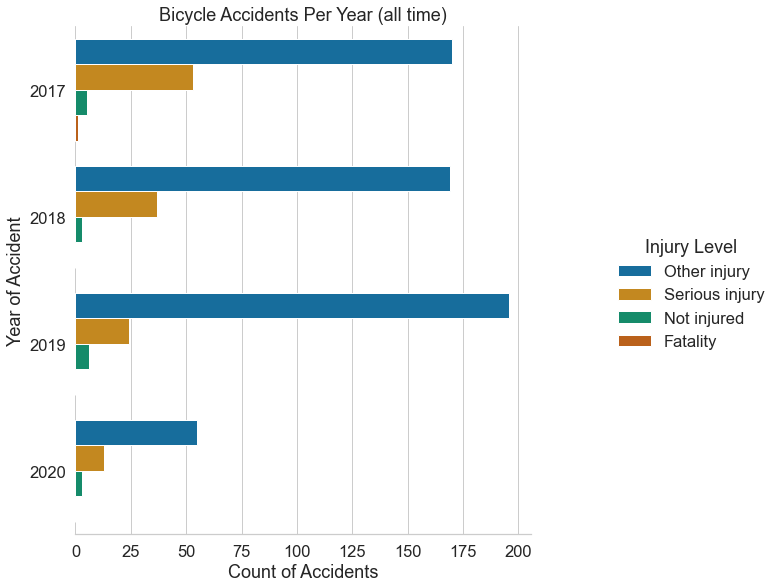

In [13]:
# Time series plots
# Accidents per hour (all time)

#Create a summary dataset to display results
wrk_accident_bicyclists_yeargrp = wrk_accident_bicyclists.groupby('NUMYearOfAcc').agg(NUMAccidentsPerYear=('NUMYearOfAcc', 'count'))
wrk_accident_bicyclists_yeargrp.reset_index(drop=False, inplace=True)
print(wrk_accident_bicyclists_yeargrp)

#Plot the summarised data
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
g = sns.catplot(y="NUMYearOfAcc", hue="CATInjuryLevelDesc_person", 
            kind="count",
            palette='colorblind', 
            alpha=1,
            height=8,
            aspect=1,
            data=wrk_accident_bicyclists.sort_values(by='NUMYearOfAcc'))
g.despine(left=True)
g.set_axis_labels("Count of Accidents", "Year of Accident")
g.legend.set_title("Injury Level")
ax = plt.gca()
ax.set_title("Bicycle Accidents Per Year (all time)")

**Inspecting 'Accidents Per Hour (All-Time)'**

In this section we will explore and observe how many bicycle accidents have occurred by accident hour.

We will use 'seaborn' and 'matplotlib' libraries for visualisations.

   hour  NUMAccidentsPerHour
0    00                    4
1    01                    3
2    02                    1
3    03                    1
4    04                    3
5    05                    5
6    06                   18
7    07                   37
8    08                   97
9    09                   60
10   10                   40
11   11                   26
12   12                   26
13   13                   26
14   14                   28
15   15                   48
16   16                   57
17   17                   93
18   18                   59
19   19                   34
20   20                   26
21   21                   16
22   22                   16
23   23                   11


Text(0.5, 1.0, 'Bicycle Accidents Per Hour (all time)')

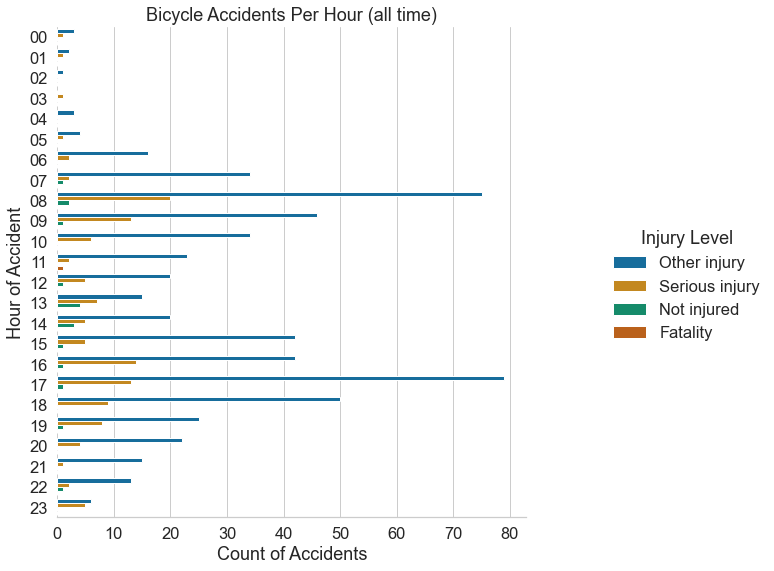

In [14]:
# Time series plots
# Accidents per hour (all time)

#Create a summary dataset to display results
wrk_accident_bicyclists_timegrp = wrk_accident_bicyclists.groupby('hour').agg(NUMAccidentsPerHour=('hour', 'count'))
wrk_accident_bicyclists_timegrp.reset_index(drop=False, inplace=True)
print(wrk_accident_bicyclists_timegrp)

#Plot the summarised data
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
g = sns.catplot(y="hour", hue="CATInjuryLevelDesc_person", 
            kind="count",
            palette='colorblind', 
            alpha=1,
            height=8,
            aspect=1,
            data=wrk_accident_bicyclists.sort_values(by='hour'))
g.despine(left=True)
g.set_axis_labels("Count of Accidents", "Hour of Accident")
g.legend.set_title("Injury Level")
ax = plt.gca()
ax.set_title("Bicycle Accidents Per Hour (all time)")


**Inspecting 'Accidents per Weekday (All-Time)'**

In this section we will explore and observe how many bicycle accidents have occurred by weekday.

We will use 'seaborn' and 'matplotlib' libraries for visualisations.

       index  CATDayOfWeek_accident
0   Thursday                    158
1  Wednesday                    134
2    Tuesday                    132
3     Monday                    118
4     Friday                     94
5   Saturday                     53
6     Sunday                     46


Text(0.5, 1.0, 'Bicycle Accidents Per Weekday (all time)')

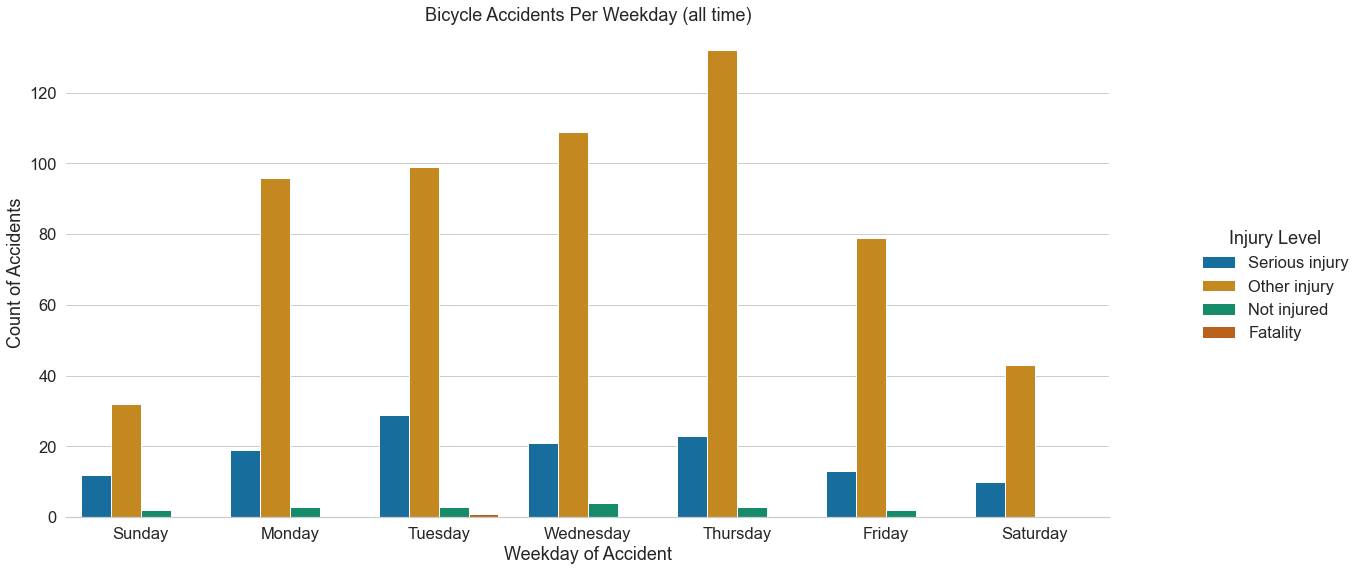

In [15]:
# Time series plots
# Accidents per week-day (all time)

#Create a summary dataset to display results
wrk_accident_bicyclists_weekdaygrp = wrk_accident_bicyclists.loc[:,'CATDayOfWeek_accident'].value_counts().to_frame()
wrk_accident_bicyclists_weekdaygrp.reset_index(drop=False, inplace=True)
print(wrk_accident_bicyclists_weekdaygrp)

#Plot the summarised data
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
g = sns.catplot(x="CATDayOfWeek_accident", y="NUMRecordCount", hue="CATInjuryLevelDesc_person", 
            kind="bar",
            palette='colorblind', 
            alpha=1,
            height=8,
            aspect=2,
            data=wrk_accident_bicyclists.sort_values(by='NUMDayOfWeek'),
            estimator=sum)
g.despine(left=True)
g.set_axis_labels("Weekday of Accident", "Count of Accidents",)
g.legend.set_title("Injury Level")
ax = plt.gca()
ax.set_title("Bicycle Accidents Per Weekday (all time)")

**Inspecting 'Accidents per Day (All-Days, Detailed)'**

In this section we will explore and observe how many bicycle accidents
have occurred each day since the earliest date recorded in the dataset.

We will use 'seaborn' and 'matplotlib' libraries for visualisations.

         index  DATAccidentDate_accident
0   2020-03-03                         6
1   2019-12-19                         5
2   2017-01-09                         5
3   2018-09-26                         4
4   2018-04-17                         3
..         ...                       ...
530 2018-02-19                         1
531 2018-02-14                         1
532 2018-02-02                         1
533 2018-02-08                         1
534 2020-11-01                         1

[535 rows x 2 columns]


<ipython-input-16-d13394deb469>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(x="DATAccidentDate_accident", y="NUMRecordCount",


Text(0.5, 1.0, 'Bicycle Accidents Per Day (all time)')

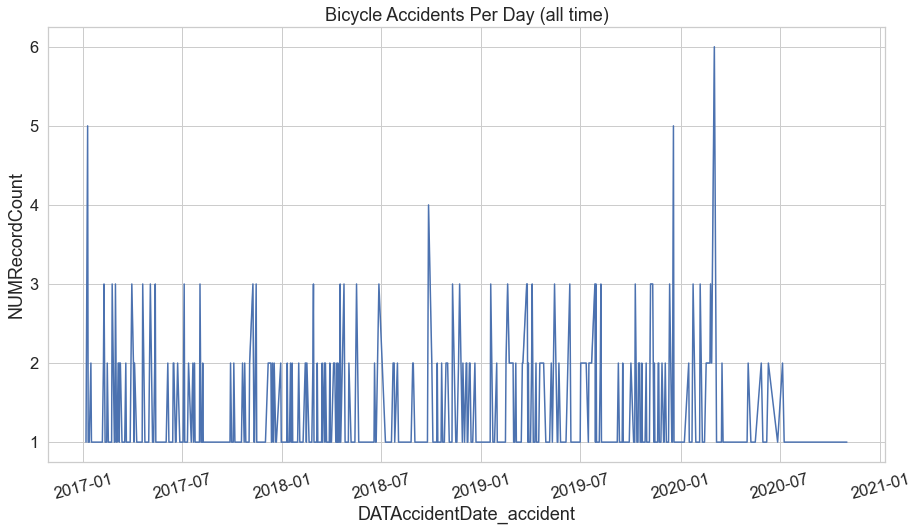

In [16]:
# Time series plots
# Accidents per day (all-time)

#Create a summary dataset to display results
wrk_accident_bicyclists_daygrp = wrk_accident_bicyclists.loc[:,'DATAccidentDate_accident'].value_counts().to_frame()
wrk_accident_bicyclists_daygrp.reset_index(drop=False, inplace=True)
print(wrk_accident_bicyclists_daygrp)

#Plot the summarised data
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.figure(figsize = (15,8))
g = sns.lineplot(x="DATAccidentDate_accident", y="NUMRecordCount", 
            palette='colorblind', 
            alpha=1,
            data=wrk_accident_bicyclists.sort_values(by='DATAccidentDate_accident'),
            estimator=sum)
plt.xticks(rotation=15)
ax = plt.gca()
ax.set_title("Bicycle Accidents Per Day (all time)")

**Inspecting 'Accidents per Weekday and Hour grouping (All-Time)'**

In this section we will explore and observe how many bicycle accidents have occurred each weekday and hour grouping.

We will use 'seaborn' and 'matplotlib' libraries for visualisations.

                        index  CATWeekDayHourGroup
0            Thursday Evening                   43
1             Tuesday Evening                   39
2            Thursday Morning                   38
3           Wednesday Evening                   38
4              Monday Evening                   30
5           Wednesday Morning                   29
6              Monday Morning                   27
7        Tuesday Late Morning                   27
8             Tuesday Morning                   26
9         Monday Late Morning                   25
10     Tuesday Late Afternoon                   25
11    Thursday Late Afternoon                   24
12     Wednesday Late Morning                   21
13   Wednesday Late Afternoon                   21
14             Friday Morning                   20
15             Friday Evening                   20
16      Thursday Late Morning                   20
17        Friday Late Morning                   18
18             Thursday Night  

Text(0.5, 1.0, 'Bicycle Accidents Per Weekday and Hour Grouping (all time)')

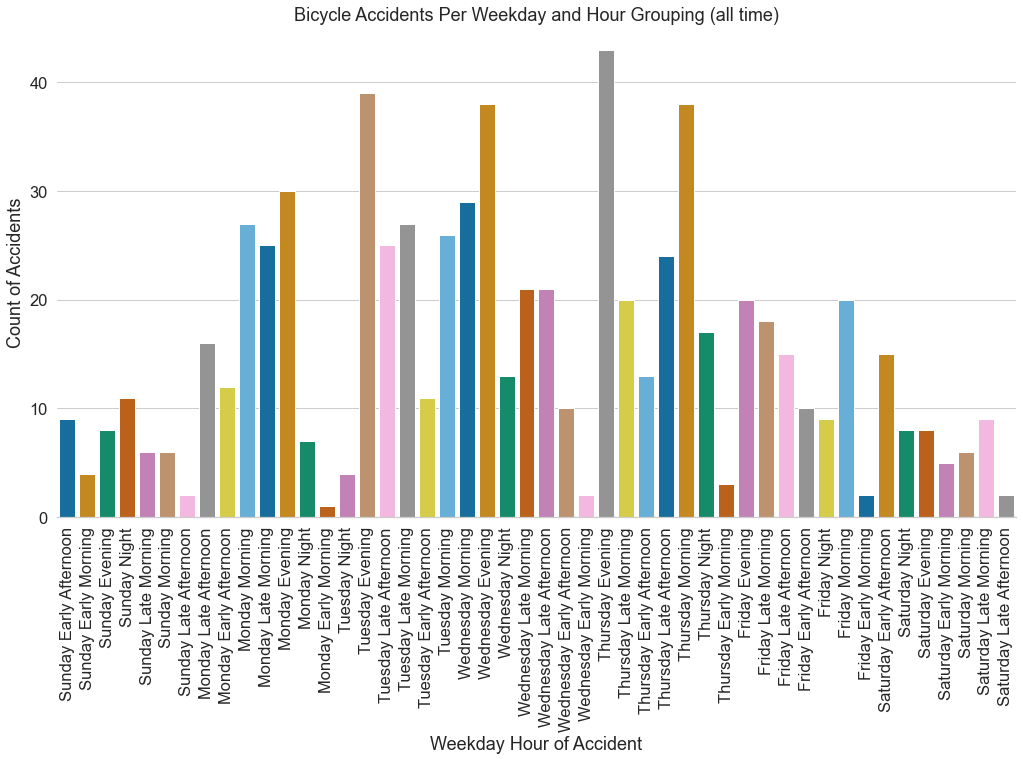

In [17]:
# Time series plots
# Accidents per Weekday and Hour Grouping (all time)

#Create a summary dataset to display results
wrk_accident_bicyclists_weekdayhrgrp = wrk_accident_bicyclists.loc[:,'CATWeekDayHourGroup'].value_counts().to_frame()
wrk_accident_bicyclists_weekdayhrgrp.reset_index(drop=False, inplace=True)
print(wrk_accident_bicyclists_weekdayhrgrp)

#Plot the summarised data
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
g = sns.catplot(x="CATWeekDayHourGroup", y="NUMRecordCount",
            kind="bar",
            palette="colorblind", 
            alpha=1,
            height=8,
            aspect=2,
            data=wrk_accident_bicyclists.sort_values(by=['NUMDayOfWeek']),
            estimator=sum)
g.despine(left=True)
g.set_axis_labels("Weekday Hour of Accident", "Count of Accidents",)
plt.xticks(rotation=90)
ax = plt.gca()
ax.set_title("Bicycle Accidents Per Weekday and Hour Grouping (all time)")

**Inspecting the 'Geography of Bicycle Accident Occurrences'**

In this section we will explore and observe the frequency of bicycle accidents by geographical locations.

We will use 'seaborn' and 'matplotlib' libraries for visualisations.

                           index  CATAccidentRoadGroup
0               ELIZABETH STREET                    48
1                 COLLINS STREET                    41
2                LA TROBE STREET                    31
3                  ST KILDA ROAD                    29
4                RACECOURSE ROAD                    22
5                  BOURKE STREET                    16
6                    KING STREET                    16
7                VICTORIA STREET                    16
8                  ALBERT STREET                    15
9                FLINDERS STREET                    15
10                SPENCER STREET                    15
11                WILLIAM STREET                    14
12    ST KILDA ROAD SERVICE ROAD                    14
13               LONSDALE STREET                    13
14             EXHIBITION STREET                    13
15              CLARENDON STREET                    13
16                 MACAULAY ROAD                    12
17        

Text(0.5, 1.0, 'Bicycle Accident Location - Roads Names (all time)')

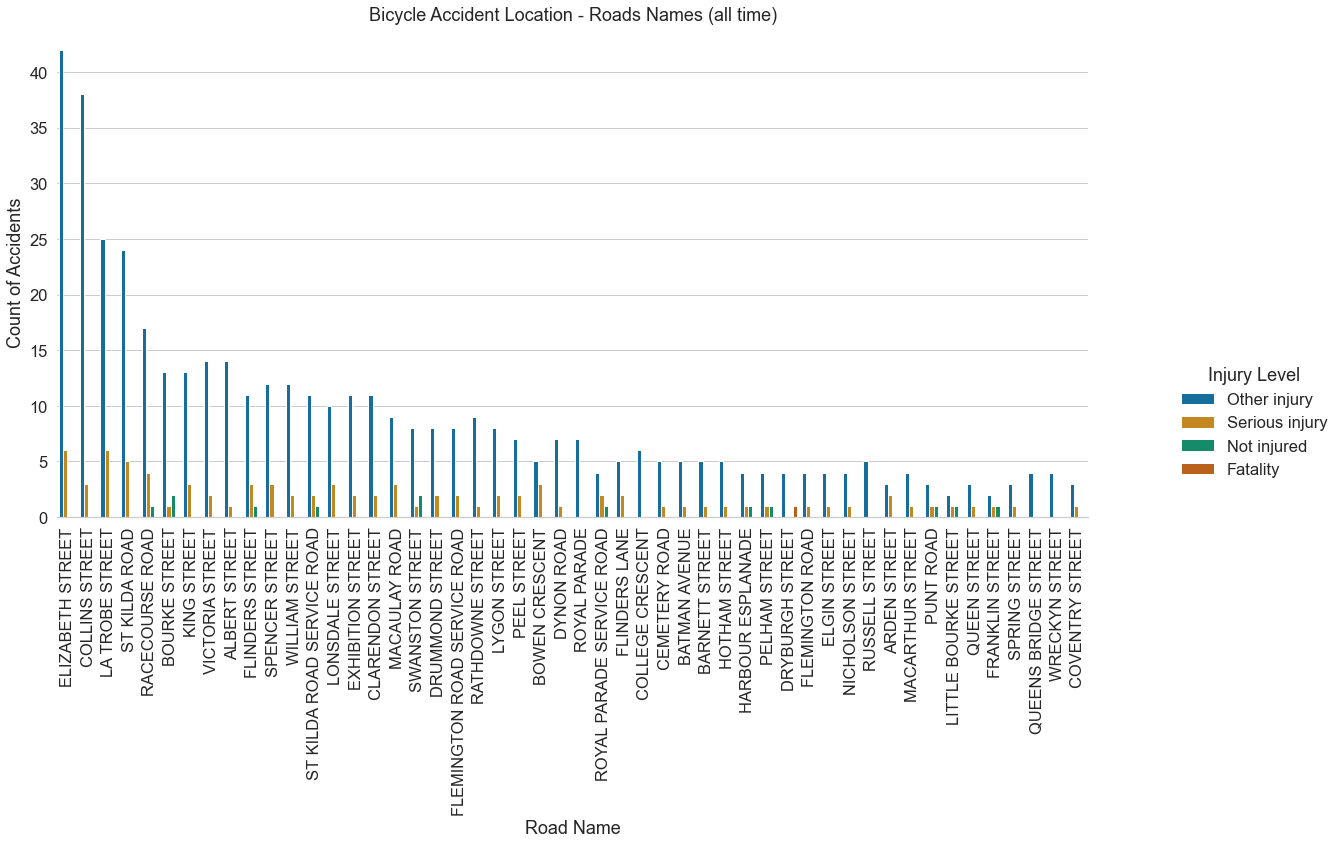

In [18]:
# Geographical analysis. Streets with most accidents
# Which roads have the most frequent accidents?

#Create a summary dataset to display results
wrk_accident_bicyclists_roadsgrp = wrk_accident_bicyclists.loc[:,'CATAccidentRoadGroup'].value_counts().to_frame()
wrk_accident_bicyclists_roadsgrp.reset_index(drop=False, inplace=True)
wrk_accident_bicyclists_roadsgrp = wrk_accident_bicyclists_roadsgrp.head(50)
print(wrk_accident_bicyclists_roadsgrp)

#Plot the summarised data
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
g = sns.catplot(x="CATAccidentRoadGroup", y="NUMRecordCount", hue="CATInjuryLevelDesc_person", 
            kind="bar",
            palette='colorblind', 
            alpha=1,
            height=8,
            aspect=2,
            order=wrk_accident_bicyclists.CATAccidentRoadGroup.value_counts().iloc[:50].index,
            data=wrk_accident_bicyclists.sort_values(by=['CATAccidentRoadGroup']),
            estimator=sum)
g.despine(left=True)
plt.xticks(rotation=90)
g.set_axis_labels("Road Name", "Count of Accidents",)
g.legend.set_title("Injury Level")
ax = plt.gca()
ax.set_title("Bicycle Accident Location - Roads Names (all time)")

<div class="usecase-section-header">Visualising the Bicycle Accident Data on a Map</div>

**Creating the first map visual to observe where bicycle accidents are occurring**

In [19]:
import folium
from folium.plugins import MarkerCluster
def map_visualization(data):
    locations = []
    for i in range(len(data)):
        row =data.iloc[i]
        location = [(row.NUMLatitude_node,row.NUMLongitude_node)]*int(row.NUMRecordCount)
        locations += location
      
    marker_cluster  = MarkerCluster(
      locations=locations,
      overlay=True,
      control=True,
      )
    m = folium.Map(location=[-37.81368709240999, 144.95738102347036], tiles="Cartodb Positron", zoom_start=13)
    marker_cluster.add_to(m)

    folium.LayerControl().add_to(m)
    
    m
    return m
map_visualization(wrk_accident_bicyclists)

<div class="usecase-section-header">Visualising the Melbourne Bicycle Route Network and Bicycle Accident Data</div>

**Creating an Alternative Map Visual to Distinguish Accidents by Year and Injury Type**

To observe the Melbourne Bicycle Route geoJSON map overlayed with the Bicycle Accident Data we can use the following code.

In [20]:
# Function to change the marker color
# according to the injury level
def color(CATInjuryLevelDesc_person):
    if CATInjuryLevelDesc_person == "Not injured":
        col = 'green'
    elif CATInjuryLevelDesc_person == "Other injury":
        col = 'blue'
    elif CATInjuryLevelDesc_person == "Serious injury":
        col = 'orange'
    elif CATInjuryLevelDesc_person == "Fatality":
        col = 'red'
    else:
        col='black'
    return col

# Creating a map object using Map() function.
# Location parameter takes latitudes and
# longitudes as starting location.
# (Map will be centered at those co-ordinates)
m = folium.Map(location=[-37.81368709240999, 144.95738102347036],
                zoom_start=14, 
                tiles="cartodbpositron",
                control_scale=True,
                prefer_canvas=True, 
                width=800, 
                height=580) 

#Create a feature group by accident year
Year2017 = folium.FeatureGroup(name = 'Accident Year 2017')
Year2018 = folium.FeatureGroup(name = 'Accident Year 2018')
Year2019 = folium.FeatureGroup(name = 'Accident Year 2019')
Year2020 = folium.FeatureGroup(name = 'Accident Year 2020')

#Loop through each row of the working dataset
for i, v in wrk_accident_bicyclists.iterrows():
    
    accyear = int(v['NUMYearOfAcc'])    
    popup = """
    Accident ID : <b>%s</b><br>
    Year : <b>%s</b><br>
    Injury : <b>%s</b><br>
    Long : <b>%s</b><br> 
    Lat: <b>%s</b><br>
    """ % (v['KEYAccidentNumber'], v['NUMYearOfAcc'], 
           v['CATInjuryLevelDesc_person'], v['NUMLongitude_node'], 
           v['NUMLatitude_node'])
    
    # For each accident year in the dataset determine 
    # all marker points and add as separate layers so we can control the display for them
    if accyear == 2017:
        folium.Marker(location = [v['NUMLatitude_node'],v['NUMLongitude_node']],                       
                           tooltip = popup,
                           icon=folium.Icon(color=color(v['CATInjuryLevelDesc_person']),
                           icon_color='yellow',icon = 'bicycle', prefix='fa')).add_to(Year2017)       
        
    if accyear == 2018:
        folium.Marker(location = [v['NUMLatitude_node'],v['NUMLongitude_node']],
                           tooltip = popup,
                           icon=folium.Icon(color=color(v['CATInjuryLevelDesc_person']),
                           icon_color='yellow',icon = 'bicycle', prefix='fa')).add_to(Year2018)
    
    if accyear == 2019:
        folium.Marker(location = [v['NUMLatitude_node'], 
                                  v['NUMLongitude_node']],                           
                           tooltip = popup,
                           icon=folium.Icon(color=color(v['CATInjuryLevelDesc_person']),
                           icon_color='yellow',icon = 'bicycle', prefix='fa')).add_to(Year2019)

    if accyear == 2020:
        folium.Marker(location = [v['NUMLatitude_node'], 
                                 v['NUMLongitude_node']],
                           tooltip = popup,
                           icon=folium.Icon(color=color(v['CATInjuryLevelDesc_person']),
                           icon_color='yellow',icon = 'bicycle', prefix='fa')).add_to(Year2020)
        
#Add the layers to the base map        
Year2017.add_to(m)
Year2018.add_to(m)
Year2019.add_to(m)
Year2020.add_to(m)

# iterate through the features in the bicyclepath DataFrame column
for i in range(bicyclepath.shape[0]):
    feature = bicyclepath["features"].loc[i]
    
    # get the coordinates of the feature
    coords = feature["geometry"]["coordinates"]
    coords = [[y, x] for x,y in coords[0]]

    # create a PolyLine object from the coordinates
    line = folium.PolyLine(coords, color='blue', weight=2).add_to(m)
    lon, lat = bicyclepath['geo_point_2d'].loc[i].values()
    
    name,direction,b_type,info,status,notes= bicyclepath.loc[i][['name','direction','type','info','status','notes']]

    iframe = folium.IFrame(f'<h4>{name}</h4><br>Directions: {direction}<br>Notes: {notes}<br>Info: {info}<br>Status: {status}')
    popup = folium.Popup(iframe, min_width=300, max_width=300)
    marker = folium.Marker(location=[lat,lon], icon=folium.Icon(icon='map-marker', prefix='fa'), popup=popup).add_to(m)

#Add the map control
folium.LayerControl(collapsed = False).add_to(m)

#Show the map
m

#Save the map
#m.save('geoJSON_bicycleaccidents_map.html')

<div class="usecase-section-header">Findings and Opportunities</div>

This analysis has provided a comprehensive starting point for inspecting the Melbourne Open Data Bicycle Network dataset and Traffic Accidents (Bicyclists) data.

**We achieved in this analysis:**

- A series of visualisations which illustrate the frequency, timing and basic characteristics of bicycle accidents occurring in Melbourne between the years 2017 and 2020
- A series of map visualisations which illustrate the precise location of where bicycle accidents have occurred and a means to visually compare the locations to the bicycle path network


**We learned from this analysis:**

- How to interpret, analyse and visualise geoJSON files
- How to create geographical maps with geoJSON files and dataframes to display geographical features
- As a preliminary view, we observed that a majority of bicycle accidents did occur on designated bicycle network routes

    At a broad level:
    
    The total number of bicycle accidents where cyclists have been seriously of fatally injured has been reducing over time (excluding the year 2020 as it was under-developed with only 3 months of data). More than 50 cyclists in 2017 to less than 25 in 2019. This appears to be a positive and optimistic trend.

    The week days of Tuesdays and Thursdays appear to have the highest numbers of seriously injured cyclists. Separate to this, the hours of 8am-10am and 4pm-6pm have the highest numbers of seriously injured cyclists.

    The top three roads with the highest number of seriously injured cyclists include Elizabeth Street, La Trobe Street and St Kilda Road.

**Observations for further opportunities**

- What are the traffic accident circumstances? Are cyclists colliding with open car doors an increasing or decreasing problem?
- Do accidents co-occur with road-works, weather events or other disruptive events?
- Report on sections of roadway where higher accident rates are observed
- Part 2 of the Bicycle Network and Road Safety exploratory data analysis will dive deeper into the timing, geography, circumstance and 'hotspots' of bicycle accidents.



<div class="usecase-section-header">References</div>

[1] Thompson Road North Geelong Road Safety Improvements https://regionalroads.vic.gov.au/map/barwon-south-west-improvements/thompson-road-safety-improvements

[2] Victorian 'Crash-Stat's dataset https://discover.data.vic.gov.au/dataset/crash-stats-data-extract/resource/392b88c0-f010-491f-ac92-531c293de2e9

[3] Bicycle Routes Dataset https://data.melbourne.vic.gov.au/Transport/Bicycle-routes-including-informal-on-road-and-off-/24aw-nd3i![image-3.png](attachment:image-3.png)


**Technical References**

[4] Accessing geoJSON data https://stackoverflow.com/questions/48263802/finding-location-using-geojson-file-using-python

[5] Accessing geoJSON data https://medium.com/analytics-vidhya/measure-driving-distance-time-and-plot-routes-between-two-geographical-locations-using-python-39995dfea7e

[6] Visualising a geoJSON dataset https://python-visualization.github.io/folium/quickstart.html#GeoJSON/TopoJSON-Overlays

[7] Visualising categorised data on a map https://www.geeksforgeeks.org/python-adding-markers-to-volcano-locations-using-folium-package/

[8] Creating point plot group layers with folium https://towardsdatascience.com/creating-an-interactive-map-of-wildfire-data-using-folium-in-python-7d6373b6334a

[9] Ideas for further opportunities - Time Series Analysis https://geohackweek.github.io/ghw2018_web_portal_inlandwater_co2/InteractiveTimeSeries.html

In [21]:
!jupyter nbconvert --to html usecase-bicyclenetworkroadsafety-part1.ipynb

[NbConvertApp] Converting notebook usecase-bicyclenetworkroadsafety-part1.ipynb to html
[NbConvertApp] Writing 3935894 bytes to usecase-bicyclenetworkroadsafety-part1.html
